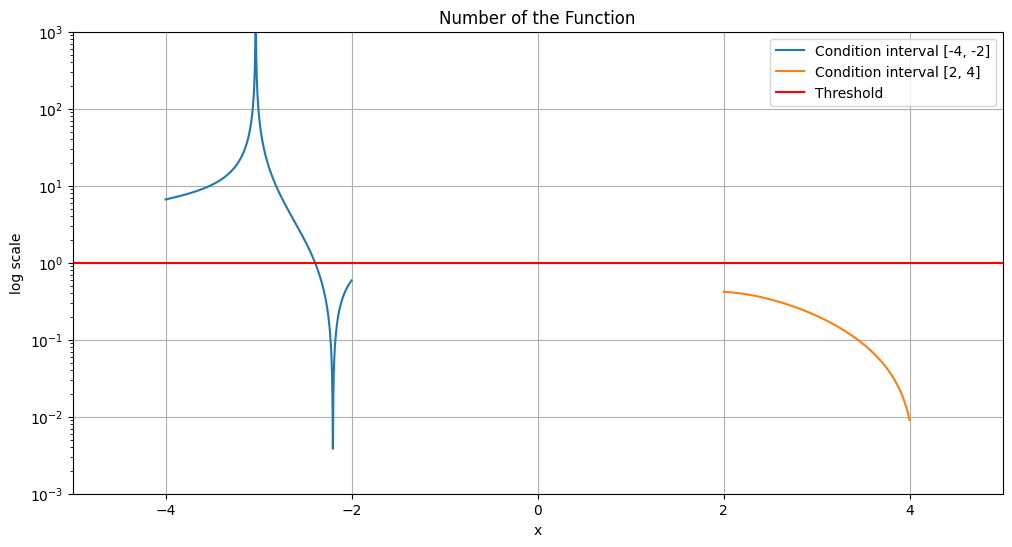

 ill-conditioned in the interval [-4, -2].
 well-conditioned in the interval [2, 4].


In [16]:
import numpy as np
import matplotlib.pyplot as plt

#functions defined
def f(x):
    return np.exp(-x) * (3.2 * np.sin(x) - 0.5 * np.cos(x)) - 3

def f_p(x):
    neg_x = np.exp(-x)
    return (-(3.2 * np.sin(x) - 0.5 * np.cos(x)) * neg_x +
            (3.2 * np.cos(x) + 0.5 * np.sin(x)) * neg_x)

#define intervals
intervals = [(-4, -2), (2, 4)]
plt.figure(figsize=(12, 6))
for a, b in intervals:
    x_values = np.linspace(a, b, 1000)
    kappa_values = []

    for x in x_values:
        f_value = f(x)
        f_prime_value = f_p(x)

        #avoid zero
        if f_value != 0:
            kappa = abs(f_prime_value) * abs(x) / abs(f_value)
        else:
            kappa = np.inf  #ill defined if fx=0

        kappa_values.append(kappa)

    plt.plot(x_values, kappa_values, label=f'Condition interval [{a}, {b}]')

# Add plot details
plt.yscale('log')
plt.title('Number of the Function')
plt.xlabel('x')
plt.ylabel('log scale')
plt.axhline(y=1, color='r', linestyle='-', label='Threshold')
plt.legend()
plt.grid()
plt.xlim(-5, 5)
plt.ylim(1e-3, 1e3)
plt.show()

# Each interval conditioning
for a, b in intervals:
    x_values = np.linspace(a, b, 1000)
    kappa_values = []

    for x in x_values:
        f_value = f(x)
        prime_value = f_p(x)

        if f_value != 0:
            kappa = abs(prime_value) * abs(x) / abs(f_value)
        else:
            kappa = np.inf

        kappa_values.append(kappa)
    if any(kappa > 1 for kappa in kappa_values):
        print(f" ill-conditioned in the interval [{a}, {b}].")
    else:
        print(f" well-conditioned in the interval [{a}, {b}].")

